In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
arrest_data = pd.read_csv('archive-police-blotter.csv')

C:\Users\Reshma\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
arrest_data_dict = pd.read_excel('archived-blotter-data-dictionary.xlsx')
arrest_data_dict

FileNotFoundError: [Errno 2] No such file or directory: 'archived-blotter-data-dictionary.xlsx'

In [4]:
arrest_data.count()

PK                      495251
CCR                     495251
HIERARCHY               495251
INCIDENTTIME            495251
INCIDENTLOCATION        495251
CLEAREDFLAG             495251
INCIDENTNEIGHBORHOOD    486921
INCIDENTZONE            495246
HIERARCHYDESC           385905
OFFENSES                495251
INCIDENTTRACT           486921
X                       486860
Y                       486860
dtype: int64

In [5]:
arrest_data.dtypes

PK                        int64
CCR                      object
HIERARCHY                 int64
INCIDENTTIME             object
INCIDENTLOCATION         object
CLEAREDFLAG              object
INCIDENTNEIGHBORHOOD     object
INCIDENTZONE             object
HIERARCHYDESC            object
OFFENSES                 object
INCIDENTTRACT           float64
X                       float64
Y                       float64
dtype: object

In [6]:
arrest_data.PK = pd.to_numeric(arrest_data.PK)
arrest_data.HIERARCHY = pd.to_numeric(arrest_data.HIERARCHY)
arrest_data.INCIDENTTIME = pd.to_datetime(arrest_data.INCIDENTTIME)
arrest_data.X = pd.to_numeric(arrest_data.X)
arrest_data.Y = pd.to_numeric(arrest_data.Y)

In [7]:
arrest_data.head()

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,HIERARCHYDESC,OFFENSES,INCIDENTTRACT,X,Y
0,2075487,5000381,6,2005-01-01 08:00:00,"5400 Block NORTHUMBERLAND ST PITTSBURGH, PA",N,Squirrel Hill North,4,MOTOR THEFT (OTHER)-PLATE ONLY,3921 Theft by Unlawful Taking or Disposition.,1401.0,-79.934027,40.438870
1,2075783,5001279,7,2005-01-03 02:00:00,"PARKVIEW PITTSBURGH, PA",N,Squirrel Hill North,4,MTR VEH THEFT (AUTO),3921 Theft by Unlawful Taking or Disposition.,407.0,0.000000,0.000000
2,2075786,5001488,7,2005-01-03 17:00:00,"CROSBY AND PAULINE & PITTSBURGH, PA",N,Squirrel Hill North,3,MOTOR VEH THEFT/TRUCK-BUS,3921 Theft by Unlawful Taking or Disposition.,1907.0,0.000000,0.000000
3,2076278,5002628,7,2005-01-05 19:30:00,"1100 Block COLFAX ST PITTSBURGH, PA",N,Squirrel Hill North,1,MTR VEH THEFT (AUTO),3921 Theft by Unlawful Taking or Disposition.,2102.0,-80.024329,40.462542
4,2076279,5002647,7,2005-01-05 20:20:00,"ALDER/SHADY & PITTSBURGH, PA",N,Shadyside,4,MTR VEH THEFT (AUTO),3921 Theft by Unlawful Taking or Disposition.,705.0,0.000000,0.000000


In [8]:
arrest_data.OFFENSES.unique()[2].split('/')[0].strip() == arrest_data.OFFENSES.unique()[5]
# arrest_data.OFFENSES.unique()[5]
row_offenses = []
for i in arrest_data.OFFENSES:
    offenses = []
    for j in i.split('/'):
        offenses.append(j.strip())
        
    row_offenses.append(offenses)

In [9]:
arrest_data['OFFENSES'] = row_offenses
arrest_data.head()

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,HIERARCHYDESC,OFFENSES,INCIDENTTRACT,X,Y
0,2075487,5000381,6,2005-01-01 08:00:00,"5400 Block NORTHUMBERLAND ST PITTSBURGH, PA",N,Squirrel Hill North,4,MOTOR THEFT (OTHER)-PLATE ONLY,[3921 Theft by Unlawful Taking or Disposition.],1401.0,-79.934027,40.438870
1,2075783,5001279,7,2005-01-03 02:00:00,"PARKVIEW PITTSBURGH, PA",N,Squirrel Hill North,4,MTR VEH THEFT (AUTO),[3921 Theft by Unlawful Taking or Disposition.],407.0,0.000000,0.000000
2,2075786,5001488,7,2005-01-03 17:00:00,"CROSBY AND PAULINE & PITTSBURGH, PA",N,Squirrel Hill North,3,MOTOR VEH THEFT/TRUCK-BUS,[3921 Theft by Unlawful Taking or Disposition.],1907.0,0.000000,0.000000
3,2076278,5002628,7,2005-01-05 19:30:00,"1100 Block COLFAX ST PITTSBURGH, PA",N,Squirrel Hill North,1,MTR VEH THEFT (AUTO),[3921 Theft by Unlawful Taking or Disposition.],2102.0,-80.024329,40.462542
4,2076279,5002647,7,2005-01-05 20:20:00,"ALDER/SHADY & PITTSBURGH, PA",N,Shadyside,4,MTR VEH THEFT (AUTO),[3921 Theft by Unlawful Taking or Disposition.],705.0,0.000000,0.000000


In [10]:
arrest_data['INCIDENTDATE'] = arrest_data.INCIDENTTIME.dt.date
arrest_data['INCIDENTYEAR'] = arrest_data.INCIDENTTIME.dt.year

In [11]:
view_by_daily_count = arrest_data.groupby('INCIDENTDATE').agg({'PK':'count'})
view_by_yearly_count = arrest_data.groupby('INCIDENTYEAR').agg({'PK':'count'})
view_by_neighborhood = arrest_data.groupby('INCIDENTNEIGHBORHOOD').agg({'PK':'count'}).sort_values('PK')
view_by_offense_desc = arrest_data.groupby('HIERARCHYDESC').agg({'PK':'count'}).sort_values('PK')

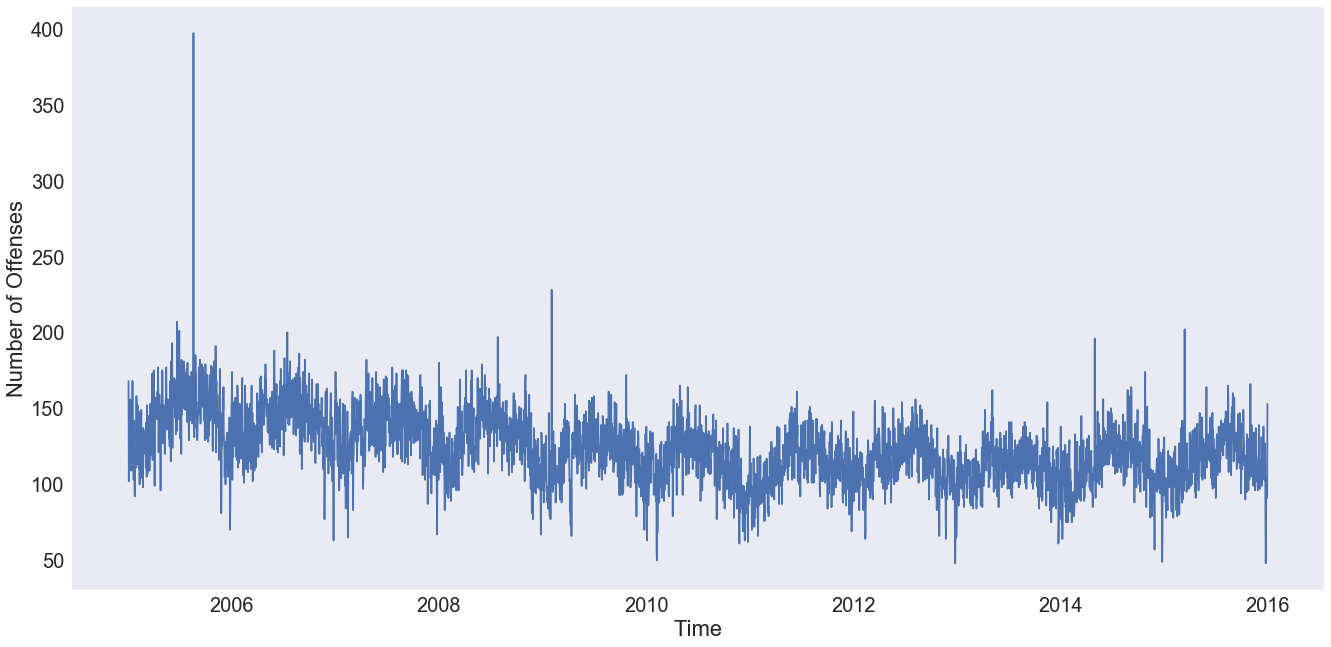

               PK
INCIDENTDATE     
2005-01-01    168
2005-01-02    102
2005-01-03    147
2005-01-04    128
2005-01-05    147
2005-01-06    135
2005-01-07    120
2005-01-08    156
2005-01-09    109
2005-01-10    131
2005-01-11    128
2005-01-12    135
2005-01-13    136
2005-01-14    115
2005-01-15    168
2005-01-16    124
2005-01-17    109
2005-01-18    114
2005-01-19    103
2005-01-20    118
2005-01-21    142
2005-01-22     99
2005-01-23     92
2005-01-24    115
2005-01-25    125
2005-01-26    126
2005-01-27    111
2005-01-28    127
2005-01-29    158
2005-01-30    128
...           ...
2015-12-02    103
2015-12-03    101
2015-12-04    114
2015-12-05     97
2015-12-06    104
2015-12-07    116
2015-12-08    106
2015-12-09    101
2015-12-10    131
2015-12-11    111
2015-12-12     99
2015-12-13    117
2015-12-14    105
2015-12-15    113
2015-12-16    122
2015-12-17    138
2015-12-18    120
2015-12-19    103
2015-12-20    109
2015-12-21    103
2015-12-22    107
2015-12-23    127
2015-12-24

In [16]:
plt.figure(figsize=(20,10))
plt.plot(view_by_daily_count)
plt.grid()
plt.ylabel('Number of Offenses')
plt.xlabel('Time')
plt.savefig('Time_series.png')
plt.show()

                                PK
INCIDENTNEIGHBORHOOD              
Outside County                 201
Outside State                  202
Mt. Oliver Boro                239
Chartiers City                 427
New Homestead                  459
Swisshelm Park                 616
East Carnegie                  734
Summer Hill                    784
Ridgemont                      817
Mt. Oliver Neighborhood        852
Hays                           875
Arlington Heights              902
Oakwood                        904
Glen Hazel                     947
Regent Square                  952
Esplen                        1050
Fairywood                     1058
Spring Garden                 1312
Windgap                       1357
Polish Hill                   1466
West End                      1560
Duquesne Heights              1583
Bon Air                       1668
Morningside                   1978
St. Clair                     2001
Allegheny West                2161
California-Kirkbride

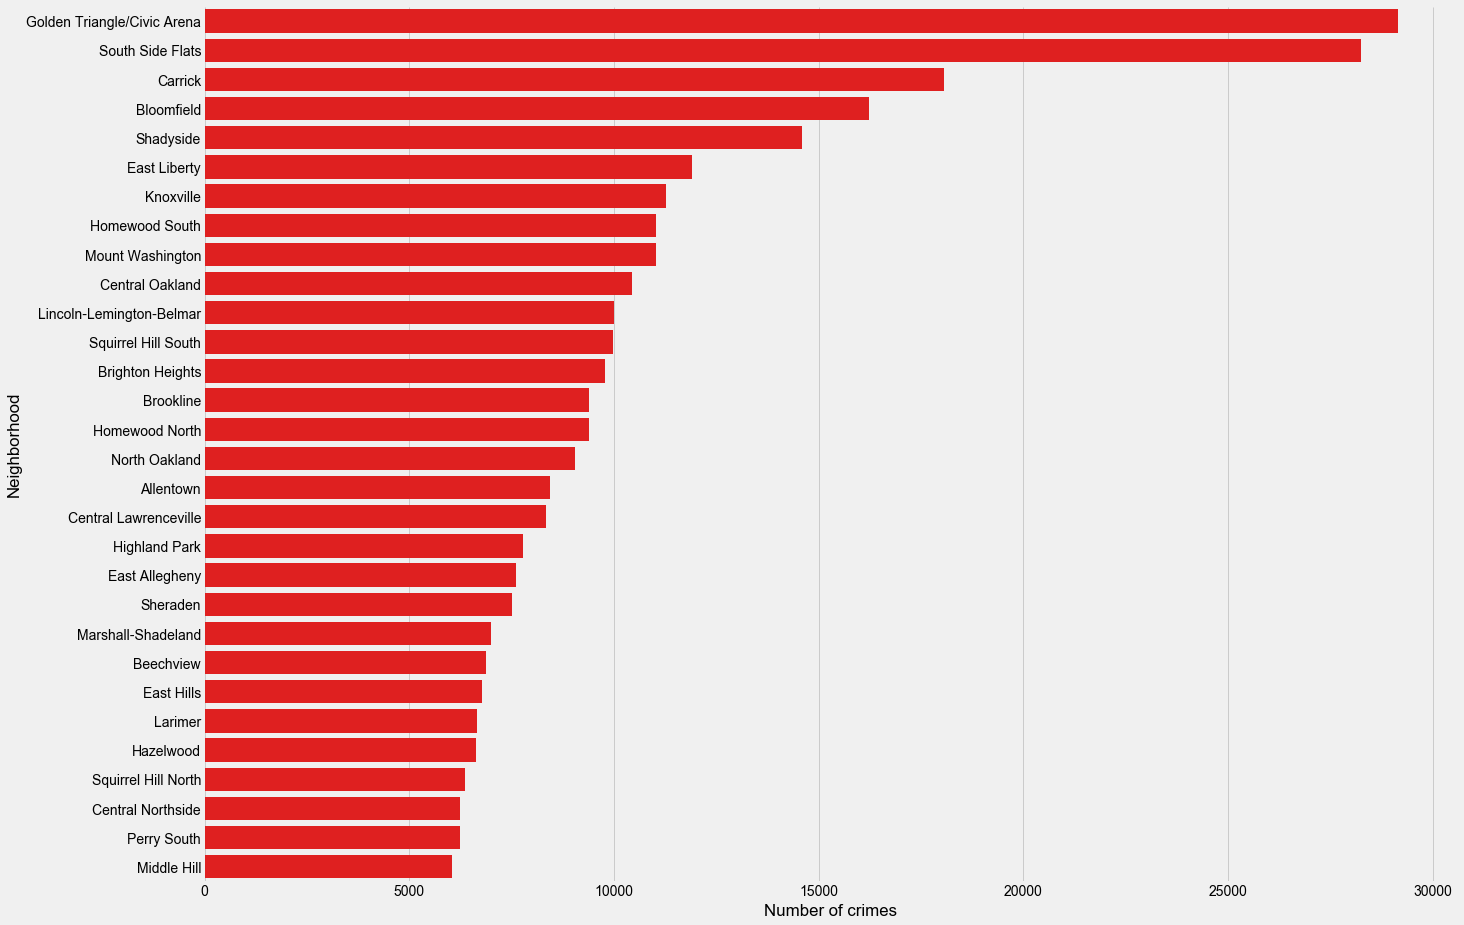

In [13]:
xi = view_by_neighborhood[::-1][:30].values[:,0]
print(view_by_neighborhood)
print(xi)
yi = view_by_neighborhood[::-1][:30].index
plt.style.use('fivethirtyeight')
plt.subplots(figsize=(20,15))
sns.barplot(x=xi,y=yi,color='r')

sns.set(font_scale=3)   
sns.despine(left=True, bottom=True)

sns.set(font_scale=2)
plt.xlim=(0,25)
plt.ylabel("Neighborhood")
plt.xlabel("Number of crimes")
plt.title('')
plt.savefig('view_by_neighborhood.png', bbox_inches='tight')
plt.show()

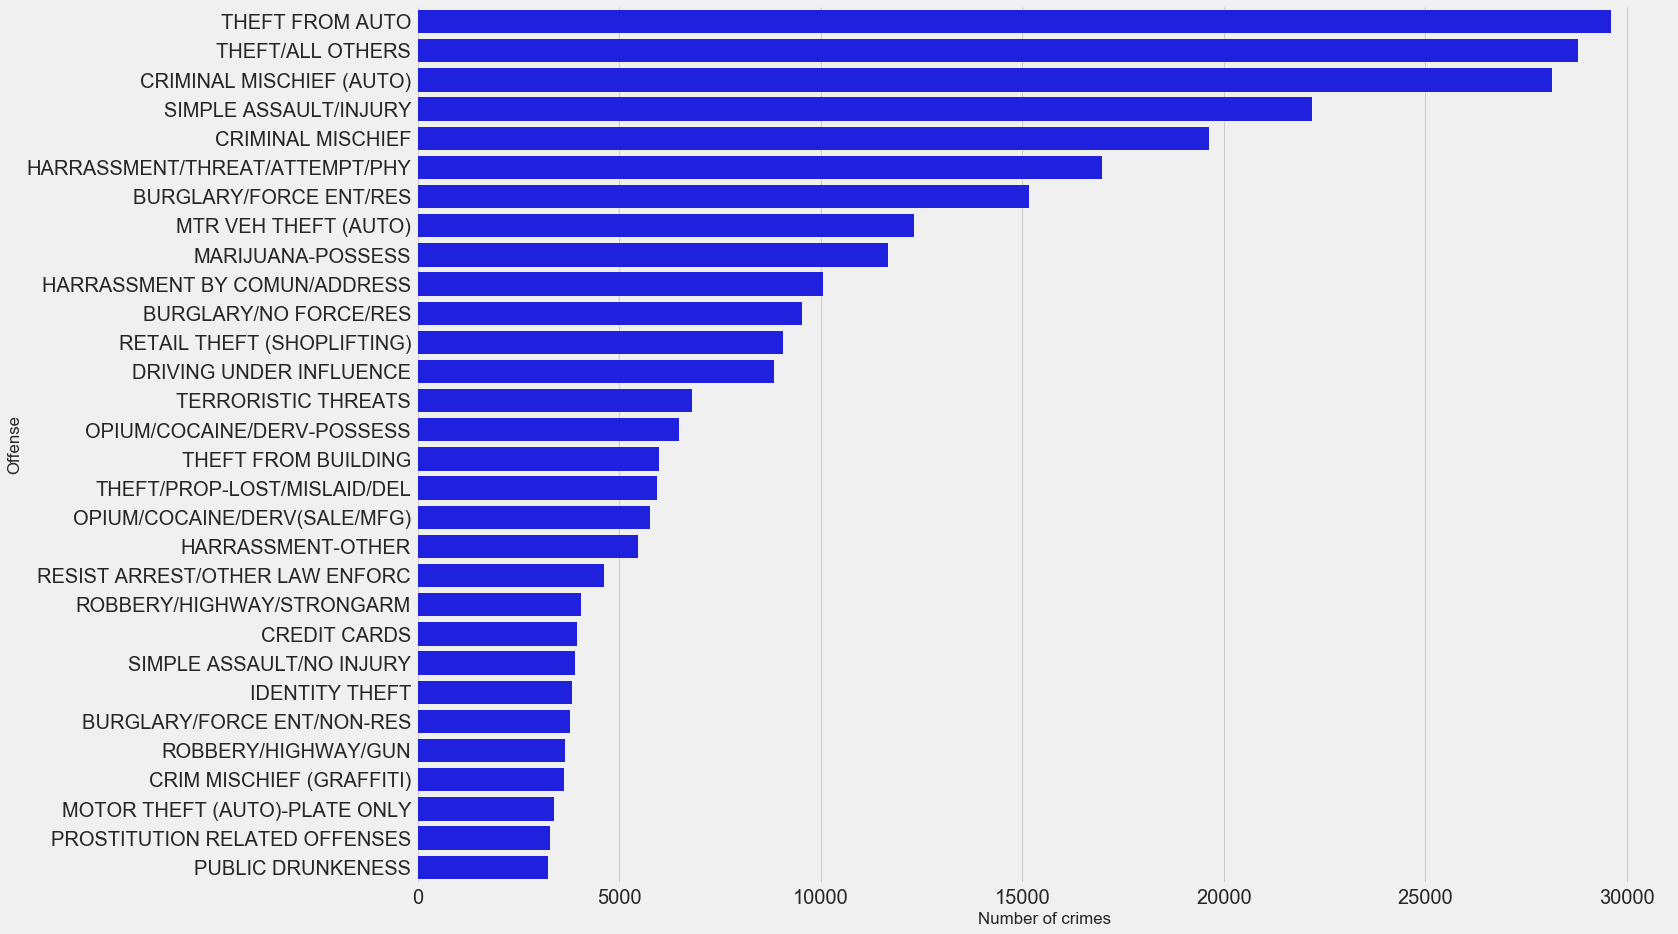

[29617 28790 28143 22188 19635 16988 15171 12313 11666 10048  9527  9057
  8835  6803  6468  5986  5937  5759  5468  4610  4055  3957  3893  3822
  3769  3639  3627  3380  3273  3214]


In [18]:
xi = view_by_offense_desc[::-1][:30].values[:,0]
yi = view_by_offense_desc[::-1][:30].index
plt.style.use('fivethirtyeight')
plt.subplots(figsize=(20,15))
sns.barplot(x=xi,y=yi,color='b')

sns.set(font_scale=3)   
sns.despine(left=True, bottom=True)

sns.set(font_scale=2)
plt.xlim=(0,25)
plt.ylabel("Offense")
plt.xlabel("Number of crimes")
plt.title('')
plt.savefig('view_by_offense_desc.png', bbox_inches='tight')
plt.show()
print(xi)

In [ ]:
# arrest_data2 = arrest_data[(arrest_data.X != 0.0) | (arrest_data.X.isnull())]
# arrest_data2 = arrest_data2[(arrest_data2.X<-70) & (arrest_data2.Y > 30)]
# arrest_data2.to_csv('edited_blotter_data.csv')

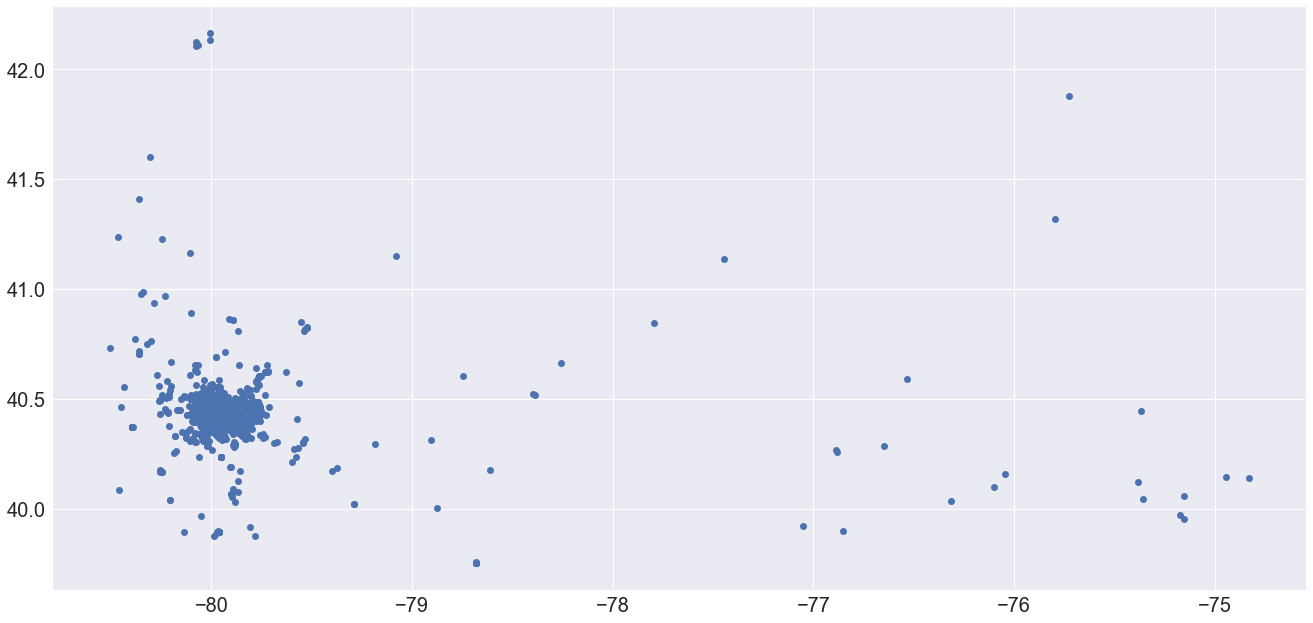

In [14]:
plt.figure(figsize=(20,10))
plt.plot(arrest_data[(arrest_data.X<-70) & (arrest_data.Y > 30)].X,arrest_data[(arrest_data.X<-70) & (arrest_data.Y > 30)].Y,'o')
plt.show()

In [15]:
agg = arrest_data2.groupby('INCIDENTNEIGHBORHOOD').agg({'PK':'count','X':'mean','Y':'mean'})
agg.to_csv('agg.csv')

NameError: name 'arrest_data2' is not defined

In [ ]:
import plotly.plotly as py

import pandas as pd

df = agg#pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv')
df.head()

# df['text'] = df['name'] + '<br>Population ' + (df['pop']/1e6).astype(str)+' million'
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]
cities = []
# scale = 5000

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    city = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_sub['Y'],
        lat = df_sub['X'],
        marker = dict(
            size = df_sub['PK'],
            sizeref = 2. * max(df_sub['PK']/scale) / (25 ** 2),
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1]) )
    cities.append(city)

layout = dict(
        title = '2014 US city populations<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict(data=cities, layout=layout)
py.iplot(fig, validate=False, filename='d3-bubble-map-populations')